# GOD model presentation

In [1]:
import sys
try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.god_model_generator import god_model_sample
from src.god_model_estimator import *
from src.compute_u import compute_u
from src.god_model_tools import evaluate_polynomial
import numpy as np
import matplotlib.pyplot as plt

# GOD model generation

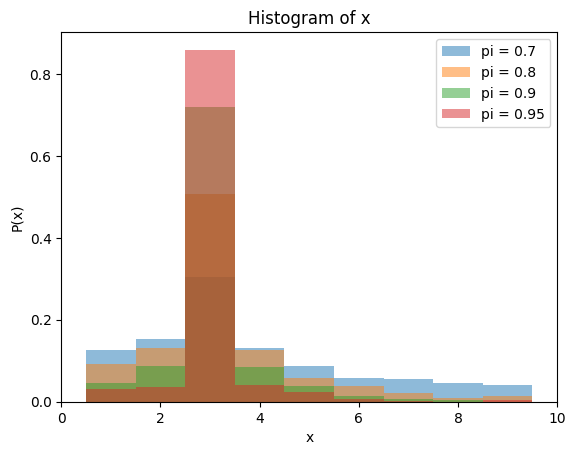

In [2]:
for pi in [0.7, 0.8, 0.9, 0.95]:
    xs = god_model_sample(m=10, mu=3, pi=pi, n_sample=1_000)
    plt.hist(xs, label=f"pi = {pi}", alpha=0.5, bins=[i + 0.5 for i in range(10)], density=True)
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Histogram of x")
plt.xlim(0, 10)
plt.legend()

# GOD model estimation

In [3]:
u = compute_u(5)

The goal of estimation is to find $\pi$ and $\mu$ that maximize the likelihood function $L_X(\pi, \mu)$.

$L_X(\pi, \mu) = mn \log\pi + \sum_{i=1}^{n} \log\left[ \sum_{d = 0}^m \left(\frac{1 - \pi}{\pi}\right)^d u(x^i, \mu, d) \right]$

To do this we can optimize the log-likelihood function $l_X(\pi, \mu)$ for each possible value of $\mu$ and then choose the one with the best likelihood.

We can look what does the log-likelihood function look like for a given $\mu$ :

/media/Data/Data/M2/Cours/Probabilistic graphical models/Projet/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:192: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(p)


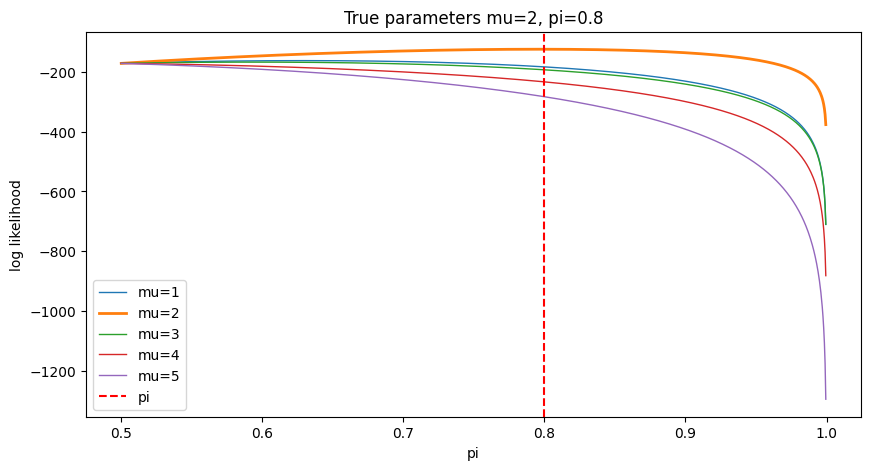

In [4]:
u = compute_u(5)

plot_log_likelihoods(m=5, mu=2, pi=0.8, u=u, nb_sample=100, seed=0)

Those functions are concaves in $\pi$ hence we can use trichothonic search to find its maximum (this is fast enough for our purposes).

## With grid search

In [5]:
%%time
for i in range(1, 6):
    for pi in [0.6, 0.7, 0.8, 0.9, 1.0]:
        xs = god_model_sample(m=5, mu=i, pi=pi, n_sample=1_000, seed=0)
        mu_hat, pi_hat, _ = estimate_mu_pi_grid(m=5, data=xs, nb_pi=100)
        print(f"mu={i}, mu_hat={mu_hat}, pi_error {abs(pi - pi_hat):.2e}, {'O' if mu_hat == i else 'X'}")

mu=1, mu_hat=1, pi_error 1.11e-02, O
mu=1, mu_hat=1, pi_error 3.03e-03, O
mu=1, mu_hat=1, pi_error 7.07e-03, O
mu=1, mu_hat=1, pi_error 4.04e-03, O
mu=1, mu_hat=1, pi_error 0.00e+00, O
mu=2, mu_hat=2, pi_error 1.01e-03, O
mu=2, mu_hat=2, pi_error 8.08e-03, O
mu=2, mu_hat=2, pi_error 7.07e-03, O
mu=2, mu_hat=2, pi_error 6.06e-03, O
mu=2, mu_hat=2, pi_error 0.00e+00, O
mu=3, mu_hat=3, pi_error 6.06e-03, O
mu=3, mu_hat=3, pi_error 7.07e-03, O
mu=3, mu_hat=3, pi_error 7.07e-03, O
mu=3, mu_hat=3, pi_error 6.06e-03, O
mu=3, mu_hat=3, pi_error 0.00e+00, O
mu=4, mu_hat=4, pi_error 1.01e-03, O
mu=4, mu_hat=4, pi_error 8.08e-03, O
mu=4, mu_hat=4, pi_error 3.03e-03, O
mu=4, mu_hat=4, pi_error 6.06e-03, O
mu=4, mu_hat=4, pi_error 0.00e+00, O
mu=5, mu_hat=5, pi_error 6.06e-03, O
mu=5, mu_hat=5, pi_error 2.02e-03, O
mu=5, mu_hat=5, pi_error 7.07e-03, O
mu=5, mu_hat=5, pi_error 6.06e-03, O
mu=5, mu_hat=5, pi_error 0.00e+00, O
CPU times: user 1min 14s, sys: 22.7 ms, total: 1min 14s
Wall time: 1min 14s

## With trichotomy

In [6]:
%%time
for i in range(1, 6):
    for pi in [0.6, 0.7, 0.8, 0.9, 1.0]:
        xs = god_model_sample(m=5, mu=i, pi=pi, n_sample=1_000, seed=0)
        mu_hat, pi_hat, _ = estimate_mu_pi(m=5, data=xs, u=u)
        print(f"mu={i}, mu_hat={mu_hat}, pi_error {abs(pi - pi_hat):.2e}, {'O' if mu_hat == i else 'X'}")

mu=1, mu_hat=1, pi_error 1.20e-02, O
mu=1, mu_hat=1, pi_error 1.25e-03, O
mu=1, mu_hat=1, pi_error 4.63e-03, O
mu=1, mu_hat=1, pi_error 2.21e-03, O
mu=1, mu_hat=1, pi_error 3.34e-05, O
mu=2, mu_hat=2, pi_error 7.73e-04, O
mu=2, mu_hat=2, pi_error 5.60e-03, O
mu=2, mu_hat=2, pi_error 6.52e-03, O
mu=2, mu_hat=2, pi_error 7.72e-03, O
mu=2, mu_hat=2, pi_error 3.34e-05, O
mu=3, mu_hat=3, pi_error 3.66e-03, O
mu=3, mu_hat=3, pi_error 4.79e-03, O
mu=3, mu_hat=3, pi_error 5.79e-03, O
mu=3, mu_hat=3, pi_error 4.94e-03, O
mu=3, mu_hat=3, pi_error 3.34e-05, O
mu=4, mu_hat=4, pi_error 2.43e-03, O
mu=4, mu_hat=4, pi_error 6.30e-03, O
mu=4, mu_hat=4, pi_error 3.95e-03, O
mu=4, mu_hat=4, pi_error 7.49e-03, O
mu=4, mu_hat=4, pi_error 3.34e-05, O
mu=5, mu_hat=5, pi_error 3.59e-03, O
mu=5, mu_hat=5, pi_error 2.10e-04, O
mu=5, mu_hat=5, pi_error 8.37e-03, O
mu=5, mu_hat=5, pi_error 5.90e-03, O
mu=5, mu_hat=5, pi_error 3.34e-05, O
CPU times: user 30.3 s, sys: 7.99 ms, total: 30.3 s
Wall time: 30.3 s
